<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Lab_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns

path_data = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'


# Exercício

Construa os modelos abaixo e para cada modelo calcule o comprimento de pétala para um exemplar que tenha todas medidas 10% acima da média de medida de sua espécie.

1. Determine a melhor regressão linear simples para determinar comprimento de pétalas a partir dos demais atributos numéricos
2. Determine a melhor regressão múltipla para determinar comprimento de pétalas empregando somente aributos numéricos
3. Inclua no modelo anterior o artibuto `species`

Vamos começar empregando a biblioteca `statsmodel`.



In [33]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
import statsmodels.formula.api as sm

lm1 = sm.ols(formula='petal_length ~ sepal_length', data=iris)
lm1 = lm1.fit()
print(lm1.summary())

lm2 = sm.ols(formula='petal_length ~ sepal_width', data=iris)
lm2 = lm2.fit()
print(lm2.summary())

lm3 = sm.ols(formula='petal_length ~ petal_width', data=iris)
lm3 = lm3.fit()
print(lm3.summary())



                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.04e-47
Time:                        13:33:44   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.1014      0.507    -14.016   

In [37]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [56]:
X_test = iris.groupby('species')[['petal_width']].mean() * 1.1
X_test

,petal_width
species,
setosa,0.2706
versicolor,1.4586
virginica,2.2286


In [57]:
lm3.predict(X_test)

species
setosa        1.686980
versicolor    4.336149
virginica     6.053203
dtype: float64

In [58]:
lm4 = sm.ols(formula='petal_length ~ sepal_length + sepal_width + petal_width - 1', data=iris)
lm4 = lm4.fit()
print(lm4.summary())

                                 OLS Regression Results                                
Dep. Variable:           petal_length   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              8426.
Date:                Tue, 09 May 2023   Prob (F-statistic):                   3.14e-164
Time:                        13:53:00   Log-Likelihood:                         -39.808
No. Observations:                 150   AIC:                                      85.62
Df Residuals:                     147   BIC:                                      94.65
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [59]:
X_test = iris.groupby('species')[['sepal_length', 'sepal_width', 'petal_width']].mean() * 1.1
X_test

,sepal_length,sepal_width,petal_width
species,,,
setosa,5.5066,3.7708,0.2706
versicolor,6.5296,3.0470,1.4586
virginica,7.2468,3.2714,2.2286


In [60]:
lm4.predict(X_test)

species
setosa        1.682788
versicolor    4.623991
virginica     6.101268
dtype: float64

In [61]:
lm5 = sm.ols(formula='petal_length ~ sepal_length + sepal_width + petal_width + species', data=iris)
lm5 = lm5.fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1317.
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.88e-118
Time:                        13:54:10   Log-Likelihood:                -9.2833
No. Observations:                 150   AIC:                             30.57
Df Residuals:                     144   BIC:                             48.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.11

In [62]:
X_test.reset_index(inplace=True)
X_test

,species,sepal_length,sepal_width,petal_width
0,setosa,5.5066,3.7708,0.2706
1,versicolor,6.5296,3.0470,1.4586
2,virginica,7.2468,3.2714,2.2286


In [63]:
lm5.predict(X_test)

0    1.719299
1    4.650762
2    6.020877
dtype: float64

# Aproximando uma Função Linear

E. Dolbear, em “The cricket as a thermometer”, American Naturalist (1897) 31, 970-971 mostrou que a frequencia do canto (gorgeio) de grilos por minuto poderia ser empregada para *estimar* a temperatura ambiente: 

$$T_{C}=f(N_{60})$$

G.W. Pierce, em “The Songs of Insects” (1948), apresenta 15 dessas medidas e convertemos abaixo as temperaturas de Fahreinheit para Celsius: 

In [ ]:
df = pd.read_csv(path_data + 'PierceCricketData.csv')
df['Temperature'] = np.round(( df['Temperature'] - 32 ) * 5/9,2)
df

,Chirps/Minute,Temperature
0,20.0,31.44
1,16.0,22.00
2,19.8,34.06
3,18.4,29.06
4,17.1,27.00
5,15.5,24.00
6,14.7,20.94
7,17.1,27.78
8,15.4,20.78
9,16.2,28.50


Aqui, temos um mapeamento de dados de entradas e saídas:

$$ f:N_{60} ⟶ T_{C} $$

e, embora você não conheça a função $T_{C}=f(N_{60})$, você observar em um gráfico que podemos buscar aproximar esses pontos por uma função linear, isto é: 

$$T_{C} \approx a_0 + a_1 N_{60}$$



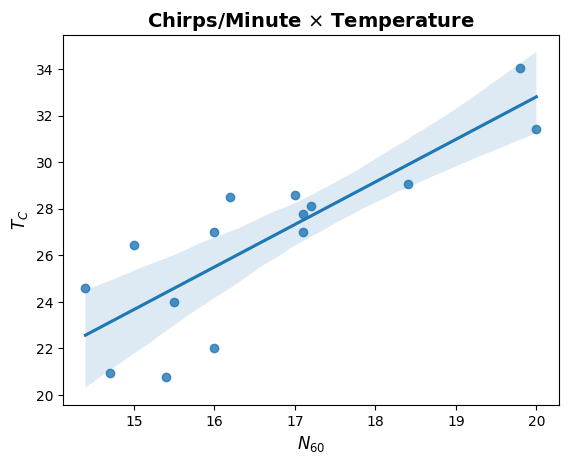

In [ ]:
fig, ax = plt.subplots()
  
sns.regplot(x=df['Chirps/Minute'], y=df['Temperature'],ax=ax)

ax.set_title('Chirps/Minute $\\times$ Temperature',fontsize=14,weight='bold')
ax.set_xlabel('$N_{60}$',fontsize=12)
ax.set_ylabel('$T_{C}$',fontsize=12)

plt.show()

Essa função pode ser obtida a partir de uma regressão linear, que é um dos modelos mais simples de Aprendizado de Máquina. Os valores obtidos desse modelo são: 

$$ T_C = -3.77 + 1.83 N_{60} $$ 

Sendo esses os coeficientes que melhor aproximam os dados de entrada e saída, isto é, têm a menor soma de erro entre os valores reais e os estimados por essa função.


# Esquema Geral do Aprendizado Supervisionado 

Todos os modelos de Aprendizado Supervisionado, isto é, modelos que empregam um conjunto de exemplos (*conjunto de treinamento*) de entradas e suas saídas, como o conjunto de dados de gorgeios/min e temperaturas acima, seguem um mesmo esquema de geral de uso:

1. Existe uma função $f: X \longrightarrow y$ que não conhecemos mas queremos estimar. 
> No nosso exemplo, é a função que leva a frequencia dos gorgeios às temperaturas.

2. Embora não conheçamos a função temos uma amostra de dados, um conjunto de *treinamento*, com as entradas e saídas $(X,y)$ e que empregaremos para *treinar* (aprender) o modelo a partir dos dados. 
> No nosso exemplo é o conjunto de 15 pontos coletados por G.W. Pierce, em “The Songs of Insects”.   

3. Vários tipos de função podem ser empregadas para aproximar o mapeamento do conjunto de dados como, funções polinomiais, exponenciais, trigonométricas etc. esses tipos consistem em diferentes *classes* de funções.
> No nosso exemplo, após inspecionar os dados, pareceu suficiente empregarmos um modelo linear e portanto, a classe de funções do tipo $g(x) = a_0 + a_1 x$.   

4. O Aprendizado (de Máquina) consiste, então, em estimar os melhores parâmetros da classe de modelos escolhida que minimiza o erro, ou a diferença entre os dados e os valores estimados $|| f(x)  - g(x) ||$.  
> No nosso exemplo, o aprendizado consiste em encontrar os coeficientes $a_0, a_1$, da classe de funções lineares $g(x) = a_0 + a_1 x$,  tal que o erro é mínimo $|| f(x)  - g(x) ||$ é mínimo. Esses coefientes resultam $g(x) = -3.77 + 1.83 x$. 

5. O modelo obtido pode ser, então, empregado para estimativa de novos valores uma vez que aproxima a função original desconhecida. 

Estes passos são representados na figura 1.

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/ML_1.png" width=800>

<small><b>
Figura 1. Esquema Geral do Aprendizado de Máquina Supervisionado e os respectivos comandos empregados no uso de estimadores do `scikit-learn`.


# Esquema Geral com o `Statsmodel`

In [ ]:
df.head()

,Chirps/Minute,Temperature
0,20.0,31.44
1,16.0,22.00
2,19.8,34.06
3,18.4,29.06
4,17.1,27.00


Formato de nomes ruins para o `Statsmodel`... 

In [ ]:
df_stat = df.copy()
df_stat.columns = ['chirps','temperature']

In [ ]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='temperature ~ chirps', data=df_stat)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     29.99
Date:                Tue, 09 May 2023   Prob (F-statistic):           0.000106
Time:                        10:55:30   Log-Likelihood:                -31.530
No. Observations:                  15   AIC:                             67.06
Df Residuals:                      13   BIC:                             68.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7693      5.589     -0.674      0.5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
Gorjeios_Observados = pd.DataFrame({'chirps': [32]})
Temperatura_Estimada = lm.predict(Gorjeios_Observados)[0]

print(f'{Temperatura_Estimada:.2f} oC')

54.76 oC


# Esquema Geral do Aprendizado Supervisionado com o `scikit-learn`

O `scikit-learn` é um dos mais populares frameworks de aprendizado de máquina em `Python` e tem diferentes modelos de aprendizado supervisionado e não supervisionados. Todos os modelos empregam um esquema similar de aplicação baseado em *estimadores*. A figura 1 apresenta para cada etapa do Aprendizado Supervisionado os respectivos comandos no uso de estimadores do `scikit-learn`. 

Veja como empregamos `scikit-learn` para estimar o modelo linear do nosso exemplo dos gorgeios e temperaturas e chegar aos coeficientes que resultam em $ g(x) = -3.77 + 1.83 x $.  

In [ ]:
from sklearn import linear_model

X=df[['Chirps/Minute']]
y=df['Temperature']

reg = linear_model.LinearRegression()

reg.fit(X, y)


LinearRegression()

```
      X=df[['Chirps/Minute']]
      y=df['Temperature']
```
1. Define o nosso conjunto de treinamento, com as entradas e saídas. No nosso exemplo há um único conjunto de valores de entrada representado pelos valores de frequência dos gorgeios. O `X` (maísculo), empregado, denota que podemos ter entradas de mais que uma dimensão, caso em que $X = (x_1, ..., x_n)$. 

```
      reg = linear_model.LinearRegression()
```

2. Define a classe de modelo a ser empregada. No caso definimos um modelo de regressão linear, mas outros tipos de função podem ser empregados como você verá mais adiante.

```
      reg.fit(X, y)
```

3. A o método `fit(X,y)` aplicado ao estimador instanciado `reg` realiza o aprendizado, que consiste em obter os melhores parâmetros do modelo definido. No caso do modelo linear, e sendo uma função de uma única variável, esses parâmetros são os coeficientes independente $a_0$ e $a_1$.

Você pode acessar esses coeficientes como a seguir.

In [ ]:
reg.coef_

array([1.82894339])

In [ ]:
reg.intercept_

-3.7693372345321947

Você pode agora empregar diretamente esses valores para estimar novos valores, por exemplo a temperatura para 16 ou 22 gorgeios/min.

In [ ]:
X_test = pd.DataFrame({'Chirps/Minute':[12, 22]})
y_pred = reg.intercept_ + reg.coef_ * X_test.values
y_pred

array([[18.17798343],
       [36.46741732]])

Mas é preferível você empregar o método `predict()` aplicando-o ao estimador para fazer este cálculo. Para a função linear o uso direto dos coeficientes é simples, mas para outras classes de funções as formas de cálculo e os parâmetros podem ser bem complexos de aplicar. 

```
      reg.predict(X_test)
``` 



In [ ]:
X_test = pd.DataFrame({'Chirps/Minute':[12, 22]})
y_pred = reg.predict(X_test)
y_pred

array([18.17798343, 36.46741732])

A seguir, o resultado do modelo aplicado a 100 diferentes valores de entrada.

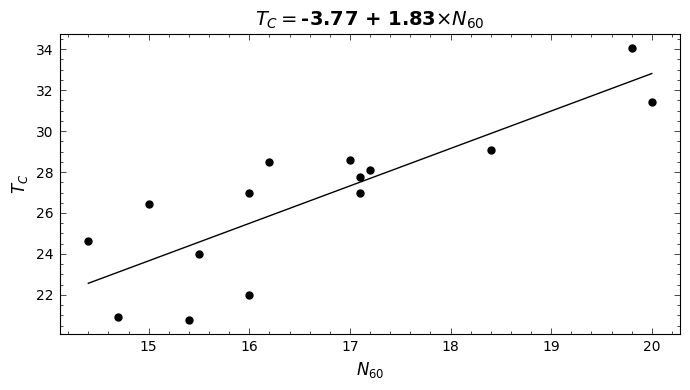

In [ ]:
X_test = pd.DataFrame({'Chirps/Minute':np.linspace(df['Chirps/Minute'].min(),df['Chirps/Minute'].max(),100)})
y_pred = reg.predict(X_test)

fig, ax = plt.subplots()

ax.scatter(x=df['Chirps/Minute'], y=df['Temperature'])
ax.plot(X_test, y_pred)

ax.set_title('$T_{C}=$' + str(np.round(reg.intercept_,2)) + ' + ' + str(np.round(reg.coef_[0],2)) + '$\\times N_{60}$' ,fontsize=14,weight='bold')
ax.set_xlabel('$N_{60}$',fontsize=12)
ax.set_ylabel('$T_{C}$',fontsize=12)

plt.tight_layout()
plt.show()

## Outros Modelos não lineares

O modelo linear é importante, mas há uma série de problemas onde a classe de funções lineares é insuficiente para aproximar o conjunto de dados.

O *Potencial de Ação* é uma *função* que explica a ativação dos neurônios e que tem um papel importante nas neurociências e aplicações médicas. O conjunto de dados a seguir mostra o valor médio do potencial de ação de um neurônio em um experimento ao longo do tempo. 

In [ ]:
import seaborn as sns
df = sns.load_dataset('dots')
df = df[(df.choice == 'T2') & (df['align'] == 'dots')]
df = df[['time','firing_rate']].groupby('time')['firing_rate'].mean().reset_index()
df.head()

,time,firing_rate
0,-80,34.350067
1,-60,34.373160
2,-40,34.740826
3,-20,35.492313
4,0,35.694765


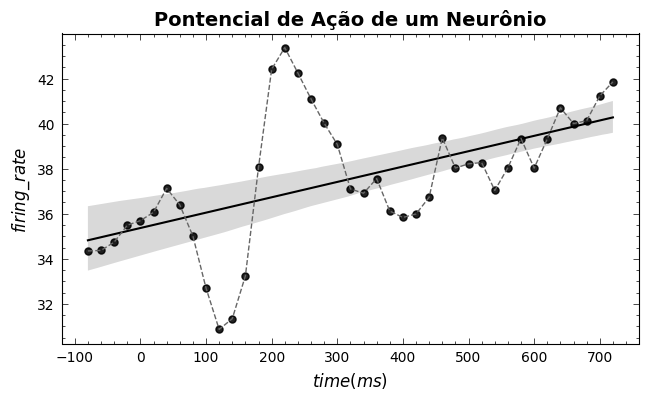

In [ ]:
sns.regplot(x=df.time, y=df.firing_rate)
sns.lineplot(x=df.time, y=df.firing_rate, linestyle='--')
plt.scatter(x=df.time, y=df.firing_rate,alpha=0.3)

plt.title('Pontencial de Ação de um Neurônio')
plt.xlabel('$time (ms)$')
plt.ylabel('$firing\_rate$')
plt.show()

Certamente, você observa que o modelo linear não é um bom modelo para esses dados. Felizmente existem muitos outros tipos de regressores (não lineares) que podem ser empregados.

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Slide3.PNG" width=800>

<small>
<b>
Figura 2. Esquema geral do Aprendizado Supervisionado de Máquina e outras Classes de Regressores.

Esses modelos empregam outros princípios, às vezes, bastante diferentes. Você pode pensar, por exemplo, nos modelos regressão polinomial ou de aproximação de funções por séries, como as séries de Taylor e Fourier. Mas ainda existem modelos que empregam paradigmas ainda mais diferentes, como modelos baseados em Árvores de Decisão, K-Vizinhos mais Próximos ou os modelos de Redes Neurais Artificiais. 

Não vamos entrar em detalhes de como cada um desses modelos funciona, mas o importante é que você entenda que, à exemplo do modelo de Regressão Linear, o Aprendizado de Máquina consiste em buscar, em uma classe de modelos escolhida, os parâmetros dessa classe de modelos que melhor se ajustam aos dados. 

> **Basicamente, o Aprendizado de Máquina consiste em buscar, em uma classe de modelos escolhida, os parâmetros dessa classe de modelos que melhor se ajustam aos dados.**



## Outros Modelos com o `scikit-learn`

Antes de aplicarmos outros modelos ao conjunto de dados de Potencial de Ação de um neurônio, vamos entender uma prática importante do Aprendizado de Máquina que é a separação dos conjuntos de dados de treinamento e teste. 



### Conjunto de Treinamento e Teste

Empregar o mesmo conjunto de dados para treinar o modelo e medir o erro do modelo (ou o seu grau de acerto), é mais ou menos como você dar uma prova para medir o resultado do aprendizado dos alunos que tenha somente testes que eles já viram durante o aprendizado, ou reino. Se o aluno memorizou as respostas, ele pode ter um resultado muito bom nos testes sem, de fato, ter aprendido. É importante, portanto, para medir o resultado do aluno com testes novos, que não tenham sido apresentados antes ao aluno. O mesmo se aplica ao Aprendizado de Máquina, devemos separar do nosso conjunto de dados uma parcela para o aprendizado e uma outra parcela para avaliar resultado do modelo, de forma que esta última parcela de teste não contamine o treinamento. 

```
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
```

A função `train_test_split()` permite fazer essa separação de modo simples, separando porções dos dados de forma aleatória. Acima, o comando separa 20% dos dados para teste e o `random_state=1` estabelece uma semente de geração aleatória para reprodutibilidade dos resultados (isto é, sem esse parâmetro novos e diferentes valores aleatórios são produzidos a cada execução).

Em Séries Temporais, para a previsão de valores, podemos ainda empregar a porção mais recente dos dados (20% por exemplo) utilizando os valores mais antigos da Série (80%), para o treinamento. 

Aplicando essa separação de dados de treinamento e teste o modelo linear para estimativa da função de Potencial Ação ficará do seguinte modo:

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df[['time']]
y = df.firing_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

reg.score(X_test,y_test)

0.2714028728260297

Você deve notar o uso do conjunto de treinamento na função `fit()` (o treinamento do modelo) e do conjunto de teste na função `predict()`, que empregamos para validar o resultado, comparando os valores previstos (`y_pred`) com os valores reais (`y_test`). O `score()` do modelo linear é o coeficiente de determinação ($R2$), e o valor $0.27$ diz que o modelo linear explica muito pouco a variação dos dados (o valor $1$ seria o valor máximo para um conjunto de dados perfeitamente linear, e zero o menor valor), o que você já tinha observado. 

Você pode observar o erro dos valores previstos pelo modelo linear no conjunto teste no gráfico abaixo. Os valores previstos (`y_pred`) encontram-se representados por marcadores *quadrados* e os valores reais (`y_test`) por *diamonds*. 

In [ ]:
def plot_firing(title='Pontencial de Ação de um Neurônio'):
  fig, ax = plt.subplots()
  sns.lineplot(x=X_train.time, y=y_train,alpha=0.35,ax=ax)
  ax.scatter(X_train.time, y_train,alpha=0.35,label='Train',marker='o')
  ax.scatter(X_test.time, y_test,label='Test',marker='D',s=36,color='k')

  ax.scatter(X_test.time,y_pred,label='Predictions',marker='s',s=36,color='k')
  ax.plot(X,reg.predict(X),lw=1,linestyle='--',color='k')

  ax.set_title(title)
  ax.set_xlabel('$time (ms)$')
  ax.set_ylabel('$firing\_rate$')
  ax.legend()

  ax.text(500,32,'Model score = ' + str(np.round(reg.score(X_test,y_test),2))) 

  plt.show()

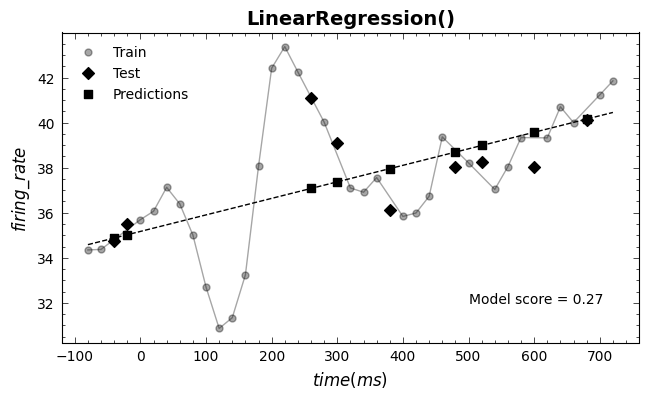

In [ ]:
plot_firing('LinearRegression()')

Esse é o melhor modelo que a classe de regressores lineares pode fornecer e, de fato, você observa que ele se ajusta muito pouco aos dados. Modelos lineares não podem capturar a grande não linearidade da função de ativação. 



### Um Modelo não linear: Regressor K-Vizinhos mais Próximos

O modelo **K-Vizinhos mais Próximos** é um modelo que ilustra bastante bem haverem outros princípios que permitem a aproximação de funções. A ideia do K-Vizinhos mais Próximos é que a estimativa de um valor desconhecido da função, ou do conjunto de teste, pode ser obtido por uma média do valor dos vizinhos mais próximos no conjunto de treinamento. O número de vizinhos $k$ variando de 1 a $n$ elementos do conjunto mais, em geral, não sendo muito superior a uma ou duas dezenas.  

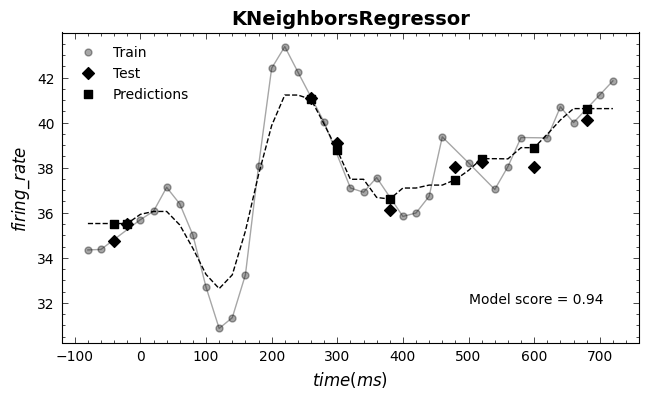

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plot_firing(title='KNeighborsRegressor')


É uma ideia bastante simples e basta você encontra os $k$ vizinhos mais próximos de um ponto que você deseja estimar a função e fazer a média desses valores. Apesar da simplicidade o modelo consegue capturar bastante bem a não linearidade da função como você pode ver acima. Esse modelo, entretanto, não é adequado para *forecasting*, isto é, as estimativas de valores *futuros* e fora do intervalo de valores do conjunto de treinamento e veremos mais adiante como ajustar esses modelos para a predição de séries temporais.

### Outros Modelos Regressores

Existem muitos outros modelos e que empregam paradigmas bastante diferentes do modelo Linear ou do modelo de k-Vizinhos mais próximos e você poderá encontrar muitas referências sobre isso.

O que nos interessa é saber que existem muitos modelos e que, por partirem de princípios de construção diferentes, levam a diferentes soluções de aproximação da função original.

A seguir você pode ver a aplicação de 3 outros modelos regressores bastante empregados **Máquinas de Vetores de Suporte**, **Decision Tree Regressor** e o modelo **XGBoosting Regressor**. Todos têm a mesma lógica de aplicação dos modelos anteriores, linear e k-vizinhos mais próximos, e você pode alterar o código abaixo para experimentar ainda outros modelos.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas

X = df[['time']]
y = df.firing_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

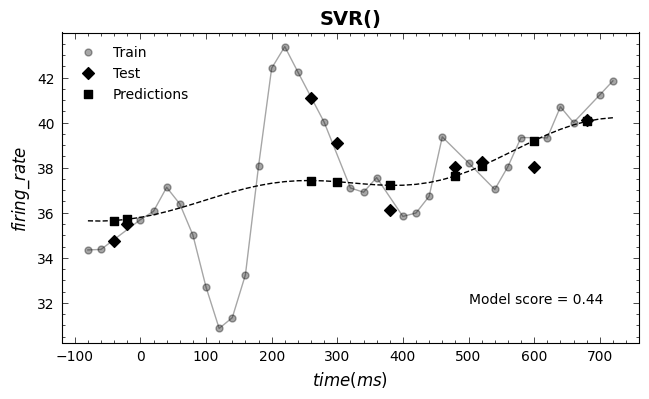

In [ ]:
reg = SVR()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plot_firing(title='SVR()')

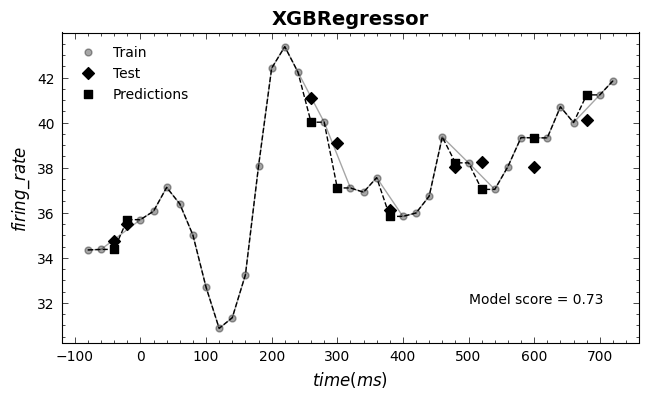

In [ ]:
reg = XGBRegressor()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plot_firing(title='XGBRegressor')

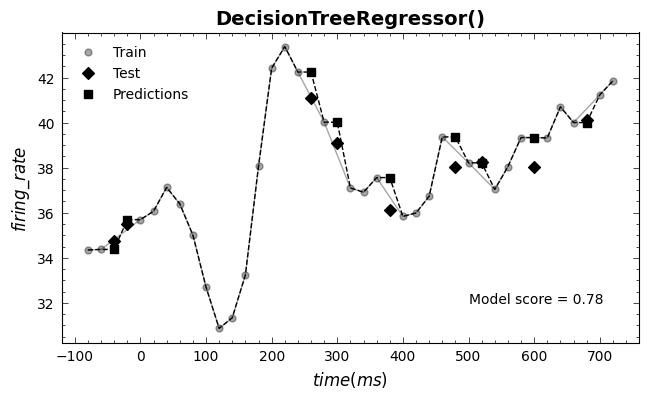

In [ ]:
reg = DecisionTreeRegressor()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plot_firing(title='DecisionTreeRegressor()')

